<a href="https://colab.research.google.com/github/prachi732/Markowitz_Portfolio/blob/master/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
assets=['PG','^GSPC']
pf_data=pd.DataFrame()
for a in assets:
  pf_data[a]=wb.DataReader(a,data_source='yahoo',start='2010-1-1')['Adj Close']

In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-05-29,115.919998,3044.310059
2020-06-01,117.250000,3055.729980
2020-06-02,118.059998,3080.820068
2020-06-03,118.529999,3122.870117
2020-06-04,116.050003,3112.350098


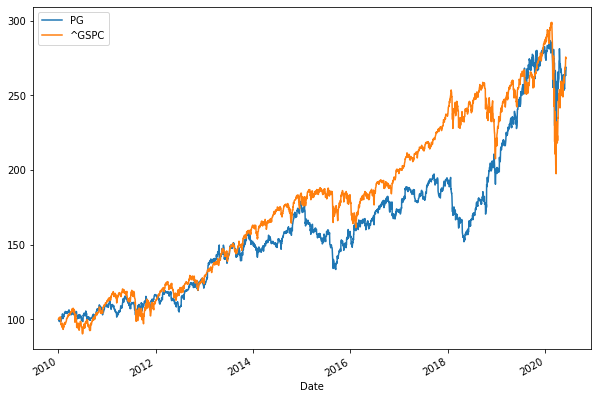

In [5]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,7))

In [0]:
log_returns=np.log(pf_data/pf_data.shift(1))

In [7]:
log_returns.mean()*250

PG       0.092352
^GSPC    0.096350
dtype: float64

In [8]:
log_returns.cov()*250

,PG,^GSPC
PG,0.029529,0.017840
^GSPC,0.017840,0.030276


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.596642
^GSPC,0.596642,1.000000


In [11]:
num_assets=len(assets)
num_assets

2

In [19]:
# Creating two random weights
arr=np.random.random(2)
arr

array([0.44187109, 0.82681793])

In [22]:
# To make the weights equal to 1
weights=np.random.random(num_assets)
weights/=np.sum(weights)
weights

array([0.66752484, 0.33247516])

In [23]:
weights[0]+weights[1]

1.0

**Expected Portfolio Return**

In [24]:
# w1r1+w2r2
np.sum(weights*log_returns.mean())*250

0.09368149948433795

**Expected Portfoio Variance**

In [25]:
np.dot(weights.T,np.dot(log_returns.cov()*250,weights))

0.024422983717109558

**Expected Portfolio Volatility**

In [26]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

0.15627854528728363

In [27]:
# Creating a combination of 1000 different weights
pfolio_returns=[]
pfolio_volatilities=[]
for x in range(1000):
  weights=np.random.random(num_assets)
  weights/=np.sum(weights)
  pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))
pfolio_returns=np.array(pfolio_returns)
pfolio_volatilities=np.array(pfolio_volatilities)
pfolio_returns,pfolio_volatilities

(array([0.09536117, 0.0940531 , 0.09405171, 0.09607513, 0.09399077,
        0.09526734, 0.0924176 , 0.09622927, 0.09456387, 0.09602918,
        0.09434096, 0.09353758, 0.09368484, 0.09600385, 0.09528979,
        0.09561534, 0.0939338 , 0.09361118, 0.09454493, 0.09551691,
        0.09623761, 0.09476314, 0.09536411, 0.09533174, 0.09421334,
        0.09609   , 0.09402897, 0.0940979 , 0.09262609, 0.09332673,
        0.09405268, 0.09463167, 0.09413697, 0.09438401, 0.09298008,
        0.09435053, 0.09601557, 0.09554323, 0.09503299, 0.09394562,
        0.09346711, 0.09427743, 0.0938251 , 0.09437542, 0.09530304,
        0.09395996, 0.09272569, 0.0941102 , 0.0957782 , 0.09528086,
        0.09368726, 0.09625675, 0.09428442, 0.09385211, 0.09383418,
        0.09402141, 0.09611221, 0.09409782, 0.09464936, 0.09514132,
        0.09506962, 0.09515531, 0.09472926, 0.09364902, 0.09245225,
        0.09479437, 0.09535904, 0.09538423, 0.09421105, 0.09498671,
        0.09421718, 0.09297236, 0.09460839, 0.09

In [0]:
portfolios=pd.DataFrame({'Return':pfolio_returns  ,'Volatility':pfolio_volatilities})

In [29]:
portfolios.head()

,Return,Volatility
0,0.095361,0.160000
1,0.094053,0.154756
2,0.094052,0.154760
3,0.096075,0.169353
4,0.093991,0.154919


In [30]:
portfolios.tail()

,Return,Volatility
995,0.095775,0.164916
996,0.094335,0.154494
997,0.095531,0.161839
998,0.096154,0.170627
999,0.094888,0.156225


Text(0, 0.5, 'Expected Return')

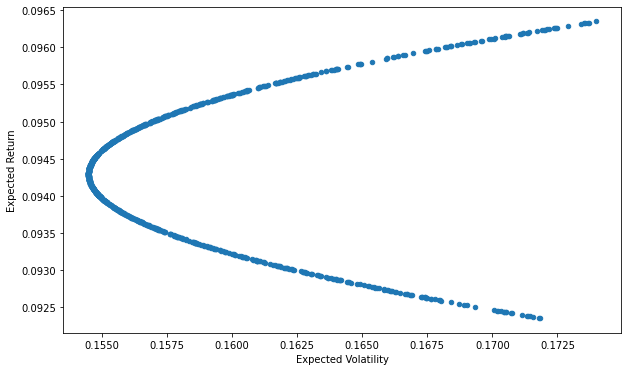

In [35]:
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')